## Chapter 2.1 数据操作

In [ ]:
# Install torchivision

!pip install torchvision

In [ ]:
# Check the current directory, make sure it's in d2l-zh

import os

os.getcwd()

In [ ]:
# Try to install d2l package

#!python ./setup.py install
!pip install d2l==1.0.3

In [ ]:
# Verity the d2l package is installed successfully

from d2l import torch as d2l
dir(d2l)

In [ ]:
# Everything is tensor, which is suitable for GPU

import torch

x = torch.arange(12)
x.shape

In [ ]:
xs = x.reshape(-1, 4)
xs

In [ ]:
y = torch.zeros(2, 3, 4, 5)
y

In [ ]:
y.shape

In [ ]:
z = torch.randn(3, 4)
z

In [ ]:
x = torch.tensor([1., 2, 4, 8])
y = torch.tensor([2, 2, 2, 2])
x+y,x-y,x*y,x/y,x**y

In [ ]:
X = torch.arange(24, dtype=torch.float32).reshape((2, 3, 4))
Y = torch.tensor([[[0, 1., 2, -1], [2., 1, 4, 3], [1, 2, 3, 4]],[[-1, 1., 2, -1], [-2., 1, 4, -3], [-1, 2, 3, -4]]])
torch.cat((X, Y), dim=1)

In [ ]:
X == Y

In [ ]:
X.sum(), Y.sum()

In [ ]:
a = torch.arange(3).reshape((3, 1))
b = torch.arange(2).reshape((1, 2))
a, b

In [ ]:
X[1, 2, 1] = 13
X

In [ ]:
a + b

In [ ]:
# 计算中会为b重新分配内存
before = id(b)
b = a + b
now = id(b)
before, now

In [ ]:
# 利用切片法防止b被重新分配内存

c = torch.zeros_like(b)
before = id(c)
c[:] = a + b
now = id(c)
before, now

In [ ]:
# tensor与ndarray的互相转化

A = X.numpy()
B = torch.tensor(A)
A, B

In [ ]:
# Tesnor与标量的转化

a = torch.tensor([3.5])
a, a.item(), float(a), int(a)

## Chapter 2.2 数据预处理

In [ ]:
# 创建一个新的数据文件csv格式, 包括房间数量NumRooms、巷子类型Alley和价格Price

import os

os.mkdir(os.path.join('..', 'data'))
data_file = os.path.join('..', 'data', 'house_tiny.csv')

with open(data_file, 'w') as f:
    f.write('NumRooms, Alley, Price\n')
    f.write('NA, Pave, 127500\n')
    f.write('2, NA, 106000\n')
    f.write('4, NA, 178100\n')
    


In [ ]:
# 利用Pandas来加载CSV数据

# ！pip install pandas

import pandas as pd

data = pd.read_csv(data_file)

print(data)

In [ ]:
# 用插值法来处理数据中的NaN（缺失值）

inputs, outputs = data.iloc[:, 0:2], data.iloc[:, 2]

outpus, inputs

In [ ]:
inputs.mean()

inputs = inputs.fillna(inputs.mean())

inputs

In [ ]:
# 处理类别列或者离散值会稍微复杂一些，本例子中Alley的取值可以是Pave，或者是NaN

inputs = pd.get_dummies(inputs)
inputs

In [ ]:
# 变成数值后，可以转化为张量格式

X = torch.tensor(inputs.to_numpy(dtype=float))
y = torch.tensor(outpus.to_numpy(dtype=float))
X, y

## Chapter 2.3 线性代数

- 标量、向量、矩阵和张量是线性代数中的基本数学对象。
- 向量泛化自标量，矩阵泛化自向量。
- 标量、向量、矩阵和张量分别具有零、一、二和任意数量的轴。
- 一个张量可以通过sum和mean沿指定的轴降低维度。
- 两个矩阵的按元素乘法被称为他们的Hadamard积。它与矩阵乘法不同。
- 在深度学习中，我们经常使用范数
- 我们可以对标量、向量、矩阵和张量执行各种操作。

In [ ]:
# 小写字母x,y等，主要用于标量

import torch

x = torch.tensor(3.)
y = torch.tensor(2.)

x + y, x * y, x / y, x ** y

In [ ]:
# 向量vector，有一组元素，大量文献认为列向量是默认的方向

X = torch.arange(12)
X

In [ ]:
# 矩阵是具备2个轴的张量

X = X.reshape((3, 4))
X

In [ ]:
Y = X.T
Y

In [ ]:
# 张量的clone操作，标量->向量->矩阵->高维张量

A = torch.arange(20, dtype=torch.float32).reshape(5, 4)
B = A.clone()

id(A) == id(B)

In [ ]:
# 张量与标量的+ 或者 * 操作，不会改变张量的形状

a = 2
X = torch.arange(24, dtype=torch.float32).reshape(2, 3, 4)

a + X, a * X

In [ ]:
X, X.shape

In [ ]:
# 通过按照维度求和，来对张量进行降维操作

# 降维，简单说就是那个维度没有了，被加起来了

X.sum(axis=0), X.sum(axis=1), X.sum(axis=2)

In [ ]:
# 求平均值，可以是全体，也可以按照维度来计算

X, X.mean(), X.mean(axis=0)

In [ ]:
# 求和时保持维度不变

sum = X.sum(axis=1, keepdims=True)
X, sum

In [ ]:
# 亦可以调用cumsum函数

sum = X.cumsum(axis=0)
X, sum

In [ ]:
# Dot product, 计算点积

x = torch.arange(4, dtype=torch.float32)
y = torch.ones(4, dtype=torch.float32)
torch.dot(x, y)

In [ ]:
# 矩阵与向量的积，torch.mv函数

A = torch.arange(12, dtype=torch.float32).reshape(3, 4)
x = torch.tensor([1., -1, 1, -1])
A, x, torch.mv(A, x)

In [ ]:
# 矩阵与矩阵的乘法，用torch.mm函数

B = torch.ones(4, 3)
torch.mm(A, B)

In [ ]:
# 线性代数中最有用的运算符是范数norm

# 欧几里得距离，是向量各个元素的平方和的根，是一个L2范数

# L1范数是向量里面的元素绝对值之和


u = torch.tensor([3.0, -4.0])
torch.norm(u)


In [ ]:
A, torch.norm(A)

In [ ]:
# 计算向量的绝对值之和，即L1范数

torch.abs(u).sum()

## Chapter 2.4 微积分

integral calculus - 积分
differencial calculus - 微分

Optimization - 优化
Generalization - 泛化


In [ ]:
# 求导数，即瞬时变化率

#将图形直接嵌入notebook中，而不是在新窗口中打开
%matplotlib inline

import numpy as np
from matplotlib_inline import backend_inline
from d2l import torch as d2l

# 定义函数f(x)=3x**2 -4x, f'(x)=6x-4, 因此x=1, 导数=2
def f(x):
    return 3 * x ** 2 - 4 * x

# 计算导数的极限值
def numerical_lim(f, x, h):
    return (f(x + h) - f(x)) / h

#通过循环来无限逼近
h = 0.1
for i in range(10):
    print(f'h={h:.8f}, numerical limit ={numerical_lim(f, 4, h):.8f}')
    h *= 0.1

In [ ]:
# Define the utility of plot function will be used commonly

# 我这个版本有些问题，正切线不能plot，需要debug......

import numpy as np
from matplotlib_inline import backend_inline
from d2l import torch as d2l

# Define use_svg_display()
def use_svg_display():
    backend_inline.set_matplotlib_formats('svg')

# Define set_figsize（）
def set_figsize(figsize=(3.5, 2.5)):
    use_svg_display()
    d2l.plt.rcParams['figure.figsize'] = figsize

# Define set_axes()

def set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend):
    axes.set_xlabel(xlabel)
    axes.set_ylabel(ylabel)
    axes.set_xscale(xscale)
    axes.set_yscale(yscale)
    axes.set_xlim(xlim)
    axes.set_ylim(ylim)
    if legend:
        axes.legend(legend)
    axes.grid()
    
# Define plot funciton

def plot(X, Y=None, 
         xlabel=None, ylabel=None, 
         legend=[], 
         xlim=None, ylim=None, 
         xscale='linear', yscale='linear', 
         fmts=('-', 'm--', 'g-.', 'r:'), figsize=(3.5, 2.5), axes=None):
    
    def has_one_axis(X):
        return (hasattr(X, "ndim") and X.ndim == 1 or isinstance(X, list) and not hasattr(X[0], "__len__"))
        
    set_figsize(figsize)
    axes = axes if axes else d2l.plt.gca()
    
    if has_one_axis(X):
        X = [X]
        
    if Y is None:
        X, Y = [[]] * len(X), X
    elif has_one_axis(Y):
        X = X * len(Y)
        
    set_figsize(figsize)
    
    if axes is None:
        axes - d2l.plt.gca()
        
    axes.cla()
    
    for x,y,fmt in zip(X, Y, fmts):
        axes.plot(x , y, fmt) if len(x) else axes.plot(y, fmt)
    
    set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend)
    
    

In [1]:
def use_svg_display():  #@save
    """Use the svg format to display a plot in Jupyter."""
    backend_inline.set_matplotlib_formats('svg')

In [2]:
def set_figsize(figsize=(3.5, 2.5)):  #@save
    """Set the figure size for matplotlib."""
    use_svg_display()
    d2l.plt.rcParams['figure.figsize'] = figsize

In [3]:
#@save
def set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend):
    """Set the axes for matplotlib."""
    axes.set_xlabel(xlabel), axes.set_ylabel(ylabel)
    axes.set_xscale(xscale), axes.set_yscale(yscale)
    axes.set_xlim(xlim),     axes.set_ylim(ylim)
    if legend:
        axes.legend(legend)
    axes.grid()

In [4]:
#@save
def plot(X, Y=None, xlabel=None, ylabel=None, legend=[], xlim=None,
         ylim=None, xscale='linear', yscale='linear',
         fmts=('-', 'm--', 'g-.', 'r:'), figsize=(3.5, 2.5), axes=None):
    
    """Plot data points."""

    def has_one_axis(X):  # True if X (tensor or list) has 1 axis
        return (hasattr(X, "ndim") and X.ndim == 1 or isinstance(X, list)
                and not hasattr(X[0], "__len__"))

    if has_one_axis(X): X = [X]
    if Y is None:
        X, Y = [[]] * len(X), X
    elif has_one_axis(Y):
        Y = [Y]
    if len(X) != len(Y):
        X = X * len(Y)

    set_figsize(figsize)
    if axes is None:
        axes = d2l.plt.gca()
    axes.cla()
    for x, y, fmt in zip(X, Y, fmts):
        axes.plot(x,y,fmt) if len(x) else axes.plot(y,fmt)
    set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend)

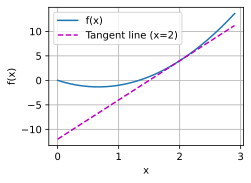

In [6]:
import numpy as np
from matplotlib_inline import backend_inline
from d2l import torch as d2l

# Try to plot the f(x) and f'(x)

# 需要给出f(x)在x某点下的正切线函数，作为参数送入plot函数

def f(x):
    return 3 * x ** 2 - 4 * x

x = np.arange(0, 3, 0.1)
plot(x, [f(x), 8 * x - 12], 'x', 'f(x)', legend=['f(x)', 'Tangent line (x=2)'])

## Chapt2.5 自动微分


In [13]:
import torch

x = torch.arange(4.0, requires_grad=True)

x.grad

y = 2 * torch.dot(x, x)

x, y

(tensor([0., 1., 2., 3.], requires_grad=True),
 tensor(28., grad_fn=<MulBackward0>))

In [14]:
# 计算y在x向量的梯度

y.backward()
x.grad

tensor([ 0.,  4.,  8., 12.])

In [15]:
# 默认情况下，PyTorch会累积梯度，我们需要清除之前的值

x.grad.zero_()

y = x.sum()

y.backward()

x.grad

tensor([1., 1., 1., 1.])

In [19]:
# 尝试Y是向量的情况，那么导数应该是一个矩阵

x.grad.zero_()
y = x * x

y.sum().backward()
x.grad

tensor([0., 2., 4., 6.])

In [20]:
# 分离计算

x.grad.zero_()
y = x * x
u = y.detach()
z = u * x

z.sum().backward()
x.grad, x.grad==u

(tensor([0., 1., 4., 9.]), tensor([True, True, True, True]))

In [21]:
# 在y上调用反响传播，计算y=x*x的导数，即2x

x.grad.zero_()
y.sum().backward()
x.grad == 2 * x

tensor([True, True, True, True])

In [23]:
# 控制流的梯度计算

def f(a):
    b = a * 2
    while b.norm() < 1000:
        b = b * 2
    if b.sum() > 0:
        c = b
    else:
        c = 100 * b
    
    return c

a = torch.randn(size=(), requires_grad=True)
d = f(a)
d.backward()

a.grad == d / a

tensor(True)

## Chapter 2.6 概率



In [26]:
%matplotlib inline
import torch
from torch.distributions import multinomial 
from d2l import torch as d2l

In [30]:
# 进行抽样

fair_probs = torch.ones([6]) / 6
multinomial.Multinomial(100, fair_probs).sample()


tensor([15., 22., 15., 18., 12., 18.])

In [31]:
counts = multinomial.Multinomial(1000, fair_probs).sample()
counts / 1000

tensor([0.1730, 0.1550, 0.1730, 0.1520, 0.1680, 0.1790])

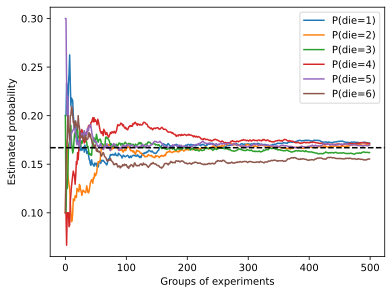

In [35]:
# 进行500组的实验，每次抽取10次，通过画图来看概率如何收敛到真实的概率

counts = multinomial.Multinomial(10, fair_probs).sample((500,))
cum_counts = counts.cumsum(dim=0)
estimates = cum_counts / cum_counts.sum(dim=1, keepdims=True)

d2l.set_figsize((6, 4.5))
for i in range(6):
    d2l.plt.plot(estimates[:, i].numpy(), label=("P(die=" + str(i + 1) + ")"))

d2l.plt.axhline(y=0.167, color='black', linestyle='dashed')
d2l.plt.gca().set_xlabel('Groups of experiments')
d2l.plt.gca().set_ylabel('Estimated probability')
d2l.plt.legend()

## Chapter 2.7


In [37]:
import d2l

print(dir(d2l.torch))

['Accumulator', 'AddNorm', 'AdditiveAttention', 'Animator', 'AttentionDecoder', 'BERTEncoder', 'BERTModel', 'BananasDataset', 'BasicScheduler', 'Benchmark', 'Classifier', 'DATA_HUB', 'DATA_URL', 'DataModule', 'Decoder', 'DotProductAttention', 'Encoder', 'EncoderDecoder', 'F', 'FashionMNIST', 'GRU', 'HPOScheduler', 'HPOSearcher', 'HPOTrainer', 'HPOTuner', 'HyperParameters', 'Image', 'LeNet', 'LinearRegression', 'LinearRegressionScratch', 'MTFraEng', 'MaskLM', 'MaskedSoftmaxCELoss', 'Module', 'MultiHeadAttention', 'NextSentencePred', 'PositionWiseFFN', 'PositionalEncoding', 'ProgressBoard', 'RNN', 'RNNLM', 'RNNLMScratch', 'RNNScratch', 'RandomGenerator', 'RandomSearcher', 'ResNeXtBlock', 'Residual', 'SGD', 'SNLIDataset', 'Seq2Seq', 'Seq2SeqEncoder', 'SoftmaxRegression', 'SuccessiveHalvingScheduler', 'SyntheticRegressionData', 'TimeMachine', 'Timer', 'TokenEmbedding', 'Trainer', 'TransformerEncoder', 'TransformerEncoderBlock', 'VOCSegDataset', 'VOC_CLASSES', 'VOC_COLORMAP', 'Vocab', '_Wik

In [39]:
help(d2l)

Help on package d2l:

NAME
    d2l - Saved source code for "Dive into Deep Learning" (https://d2l.ai).

DESCRIPTION
    Please import d2l by one of the following ways:
    
    from d2l import mxnet as d2l  # Use MXNet as the backend
    from d2l import torch as d2l  # Use PyTorch as the backend
    from d2l import tensorflow as d2l  # Use TensorFlow as the backend
    from d2l import jax as d2l  # Use Jax as the backend

PACKAGE CONTENTS
    jax
    mxnet
    tensorflow
    torch

VERSION
    1.0.3

FILE
    /home/ec2-user/anaconda3/envs/pytorch_p310/lib/python3.10/site-packages/d2l/__init__.py




In [42]:
d2l.torch??